FaceParsing
====

```bash
pip install torch torchvision
pip install transformers
```

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torch import nn
from transformers import (
    SegformerImageProcessor,
    SegformerForSemanticSegmentation
)

device = ("cuda" if torch.cuda.is_available() else "cpu")

# load models
image_processor = SegformerImageProcessor.from_pretrained(
    "jonathandinu/face-parsing"
)
model = SegformerForSemanticSegmentation.from_pretrained(
    "jonathandinu/face-parsing"
)
model.eval().to(device);

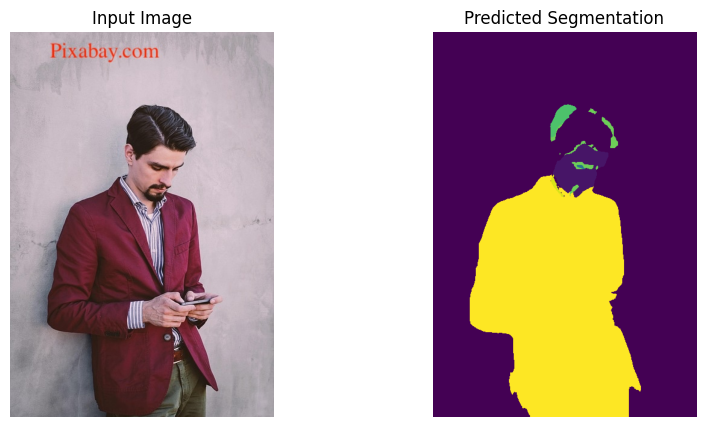

In [5]:
image_path = "../samples/person.jpg"
image = Image.open(image_path).convert("RGB")

inputs = image_processor(
    images=image, return_tensors="pt"
).to(device)
outputs = model(**inputs)
logits = outputs.logits
# shape (batch_size, num_labels, ~height/4, ~width/4)

# resize output to match input image dimensions
upsampled_logits = nn.functional.interpolate(
    logits,
    size=image.size[::-1],  # H x W
    mode='bilinear',
    align_corners=False
)

# get label masks
labels = upsampled_logits.argmax(dim=1)[0]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[0].axis("off")
axes[1].imshow(labels.cpu().numpy())
axes[1].set_title("Predicted Segmentation")
axes[1].axis("off")
plt.show()